In [1]:
### libraries
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *
import itertools
import random
import scipy
import six
import re

from __future__ import print_function
from pprint import pprint
import time as time
import seaborn as sns
sns.set()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split

/home/ubuntu/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
path = r'/home/ubuntu/yelp/reviews_all.csv'
reviews = pd.read_csv(path)
reviews['Rating_nom'] = ["one" if Rating == 1 else "two" if Rating == 2 else "three" if Rating == 3 
                else "four" if Rating == 4 else "five" for Rating in reviews.Rating]
reviews = reviews[['Text','Rating_nom']]

In [3]:
labels = ["one","two","three","four","five"]

def plot_confusion(confmat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confmat)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [4]:
reviews_sample = reviews.sample(n = 100000)
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer(stop_words='english')),
    ('transformer', TfidfTransformer()),
    ('lrClassifier',  LogisticRegression(multi_class='multinomial',solver='lbfgs')) ])

parameters = {
    'vectorizer__ngram_range': ((1,1),(1,2),(1,3)),
    'vectorizer__max_df': (0.6, 0.75),
    'vectorizer__min_df': (1000, 0.01, 0.1),
    'transformer__use_idf': (True, False),
    'lrClassifier__max_iter': (100, 200) 
}
        
if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=10, cv=2)

    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time.time()
    grid_search.fit(reviews_sample.Text.values, reviews_sample.Rating_nom.values)
    print("done in %0.3fs" % (time.time() - t0))
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

pipeline: ['vectorizer', 'transformer', 'lrClassifier']
parameters:
{'lrClassifier__max_iter': (100, 200),
 'transformer__use_idf': (True, False),
 'vectorizer__max_df': (0.6, 0.75),
 'vectorizer__min_df': (1000, 0.01, 0.1),
 'vectorizer__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 28.0min finished


done in 1779.961s
Best score: 0.561
Best parameters set:
	lrClassifier__max_iter: 200
	transformer__use_idf: True
	vectorizer__max_df: 0.6
	vectorizer__min_df: 0.01
	vectorizer__ngram_range: (1, 2)
[CV] vectorizer__min_df=1000, transformer__use_idf=True, vectorizer__ngram_range=(1, 1), lrClassifier__max_iter=100, vectorizer__max_df=0.6 
[CV] vectorizer__min_df=1000, transformer__use_idf=True, vectorizer__ngram_range=(1, 1), lrClassifier__max_iter=100, vectorizer__max_df=0.6 
[CV] vectorizer__min_df=1000, transformer__use_idf=True, vectorizer__ngram_range=(1, 2), lrClassifier__max_iter=100, vectorizer__max_df=0.6 
[CV] vectorizer__min_df=1000, transformer__use_idf=True, vectorizer__ngram_range=(1, 2), lrClassifier__max_iter=100, vectorizer__max_df=0.6 
[CV] vectorizer__min_df=1000, transformer__use_idf=True, vectorizer__ngram_range=(1, 3), lrClassifier__max_iter=100, vectorizer__max_df=0.6 
[CV] vectorizer__min_df=1000, transformer__use_idf=True, vectorizer__ngram_range=(1, 3), lrClassi

In [4]:
reviews_sample = reviews.sample(n = 200000)
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer(stop_words='english', ngram_range=(1,2))),
    ('transformer', TfidfTransformer(use_idf=True)),
    ('lrClassifier',  LogisticRegression(multi_class='multinomial',solver='lbfgs')) ])

parameters = {
   # 'vectorizer__ngram_range': ((1,1),(1,2)),
    'vectorizer__max_df': (0.5, 0.6, 0.75),
    'vectorizer__min_df': (100, 1000, 0.01, 0.1),
   # 'transformer__use_idf': (True, False),
   # 'lrClassifier__max_iter': (100, 200) 
}
        
if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=10, cv=2)

    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time.time()
    grid_search.fit(reviews_sample.Text.values, reviews_sample.Rating_nom.values)
    print("done in %0.3fs" % (time.time() - t0))
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

pipeline: ['vectorizer', 'transformer', 'lrClassifier']
parameters:
{'vectorizer__max_df': (0.5, 0.6, 0.75),
 'vectorizer__min_df': (100, 1000, 0.01, 0.1)}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  9.5min finished


done in 802.242s
Best score: 0.588
Best parameters set:
	vectorizer__max_df: 0.5
	vectorizer__min_df: 100
[CV] vectorizer__min_df=100, vectorizer__max_df=0.5 ..................
[CV] vectorizer__min_df=100, vectorizer__max_df=0.5 ..................
[CV] vectorizer__min_df=1000, vectorizer__max_df=0.5 .................
[CV] vectorizer__min_df=1000, vectorizer__max_df=0.5 .................
[CV] vectorizer__min_df=0.01, vectorizer__max_df=0.5 .................
[CV] vectorizer__min_df=0.01, vectorizer__max_df=0.5 .................
[CV] vectorizer__min_df=0.1, vectorizer__max_df=0.5 ..................
[CV] vectorizer__min_df=0.1, vectorizer__max_df=0.5 ..................
[CV] vectorizer__min_df=100, vectorizer__max_df=0.6 ..................
[CV] vectorizer__min_df=100, vectorizer__max_df=0.6 ..................
[CV] vectorizer__min_df=1000, vectorizer__max_df=0.6 .................
[CV] vectorizer__min_df=1000, vectorizer__max_df=0.6 .................
[CV] vectorizer__min_df=0.01, vectorizer__

             precision    recall  f1-score   support

        one       0.68      0.72      0.70     29184
        two       0.53      0.40      0.45     32409
      three       0.55      0.40      0.46     51230
       four       0.55      0.64      0.59    106542
       five       0.70      0.73      0.71    110844

avg / total       0.61      0.61      0.61    330209

             precision    recall  f1-score   support

        one       0.67      0.72      0.69     29226
        two       0.51      0.41      0.46     32474
      three       0.52      0.45      0.48     51161
       four       0.57      0.60      0.58    106666
       five       0.70      0.72      0.71    110682

avg / total       0.61      0.61      0.61    330209

             precision    recall  f1-score   support

        one       0.69      0.68      0.68     28803
        two       0.51      0.44      0.47     32693
      three       0.52      0.43      0.47     51231
       four       0.56      0.62      0

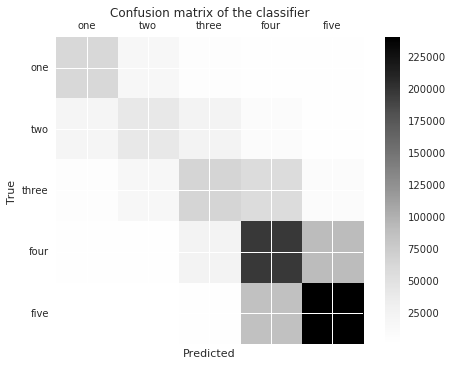

In [5]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer(ngram_range=(1,2), stop_words='english',
                                   max_df=0.5, min_df=100)),
    ('transformer', TfidfTransformer(use_idf=True)),
    ('classifier',  LogisticRegression(multi_class='multinomial',solver='lbfgs')) ])

k_fold = KFold(n=len(reviews), n_folds=3)
scores = []
confusion = np.zeros(shape=(5,5))
for train_indices, test_indices in k_fold:
    train_text = reviews.iloc[train_indices]['Text'].values
    train_y = reviews.iloc[train_indices]['Rating_nom'].values

    test_text = reviews.iloc[test_indices]['Text'].values
    test_y = reviews.iloc[test_indices]['Rating_nom'].values

    pipeline.fit(train_text, train_y)
    predictions = pipeline.predict(test_text)

    confusion += confusion_matrix(test_y, predictions, 
                                  labels = labels)
    print(metrics.classification_report(test_y, predictions, labels = labels))

print('Total reviews classified:', len(reviews))
#print('Score:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)
plot_confusion(confusion)